# The Sparks Foundation
Data Science and Business Analytics Internship

##### Name: Sayantan Bhattacharyya
##### July 2021 intern

##### College: Institute of Engineering & Management, Kolkata
##### Year of study: 2020-2024

###### e-mail: sayantan0201@gmail.com

###### Task: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
###### Data Source-- : https://bit.ly/3kXTdox

### 1.1 Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")

### 1.2 Reading Data

In [3]:
# Reading data
col_list = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
data = pd.read_csv("Iris.csv")
iris_data = pd.read_csv("Iris.csv", usecols=col_list)
# Converting the data into dataframe
df = pd.DataFrame(iris_data)
print("Data loaded successfully!!")
df

Data loaded successfully!!


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 1.3 Describing the data

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


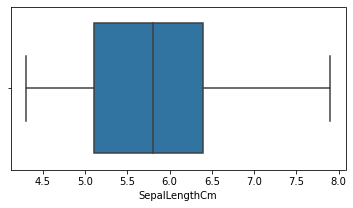

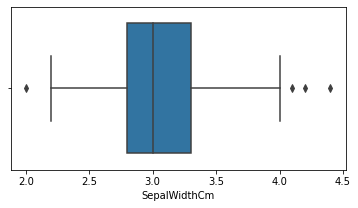

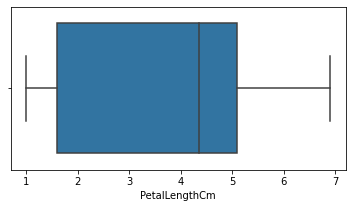

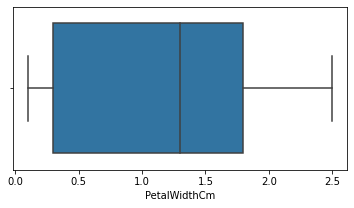

In [5]:
## Check for any outliers in the numeric data
for i in data.columns:
    if data[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sbn.boxplot(data[i])
        plt.show()

In [6]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

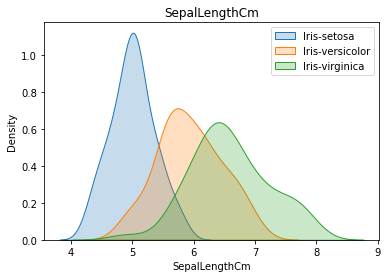

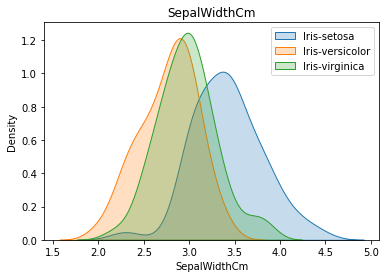

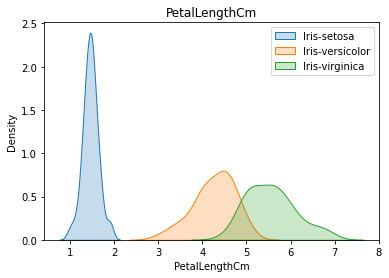

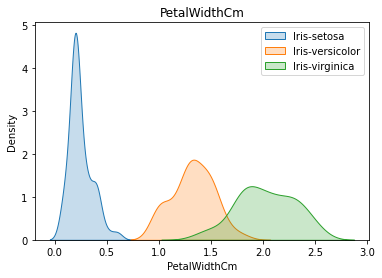

In [7]:
# Distributions of features by Species

for i in data.columns[1:-1]:
    sbn.kdeplot(data = data.loc[data.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    sbn.kdeplot(data = data.loc[data.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)
    sbn.kdeplot(data = data.loc[data.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)
    plt.title(i);
    plt.legend()
    plt.show()

### 1.4 Finding the optimum number of clusters for k-means classification

In [8]:
x = df.iloc[:, [0, 1, 2, 3]].values

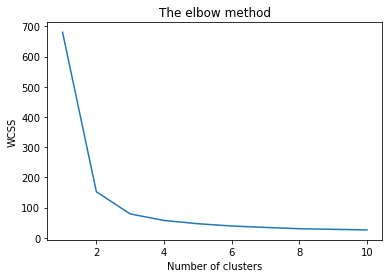

In [9]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

### 1.5 Applying K-Means to the dataset

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

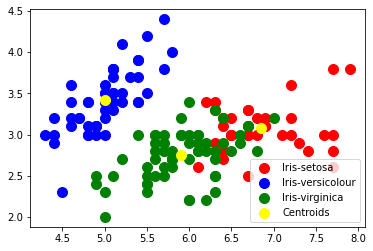

In [11]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### 1.6 Evaluation

In [13]:
data['cluster'] = kmeans.labels_

#For cluster 0
print("Cluster 0--")
data.loc[data['Species']=='Iris-versicolor']['cluster'].value_counts()


Cluster 0--


2    48
0     2
Name: cluster, dtype: int64

In [15]:
#For cluster 1
print("Cluster 1--")
data.loc[data['Species']=='Iris-setosa']['cluster'].value_counts()
## the model has identified iris-setosa with 100% accuracy

Cluster 1--


1    50
Name: cluster, dtype: int64

In [16]:
#For cluster 2
print("Cluster 2--")
data.loc[data['Species']=='Iris-virginica']['cluster'].value_counts()

Cluster 2--


0    36
2    14
Name: cluster, dtype: int64

In [17]:
data['Species_encoded'] = data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,2


In [19]:
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.05      0.04      0.05        50
           1       1.00      1.00      1.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.44       150
   macro avg       0.43      0.44      0.43       150
weighted avg       0.43      0.44      0.43       150



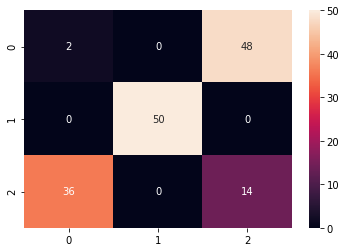

In [22]:
sbn.heatmap(confusion_matrix(data['Species_encoded'],data['cluster']), annot=True);